In [139]:
import pandas as pd
import numpy as np
from category_encoders.leave_one_out import LeaveOneOutEncoder
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Vizualisation:  

In [2]:
df_raw = pd.read_csv('Train.csv') #load data

In [3]:
df_raw.set_index('ID', inplace=True) #set index 'ID'

In [4]:
df_raw.shape

(107833, 9)

In [5]:
df_raw.drop_duplicates(ignore_index=True) # no duplicates

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [6]:
df_raw.info() 
#no missing data 
#catogerical & time data 
#target is numerical

<class 'pandas.core.frame.DataFrame'>
Index: 107833 entries, train_id_0 to train_id_107832
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DATOP   107833 non-null  object 
 1   FLTID   107833 non-null  object 
 2   DEPSTN  107833 non-null  object 
 3   ARRSTN  107833 non-null  object 
 4   STD     107833 non-null  object 
 5   STA     107833 non-null  object 
 6   STATUS  107833 non-null  object 
 7   AC      107833 non-null  object 
 8   target  107833 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.2+ MB


In [7]:
df_raw.nunique() #populated categorical features 

DATOP      1011
FLTID      1861
DEPSTN      132
ARRSTN      128
STD       81697
STA       85136
STATUS        5
AC           68
target      968
dtype: int64

In [8]:
df_raw.STATUS.value_counts()

ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: STATUS, dtype: int64

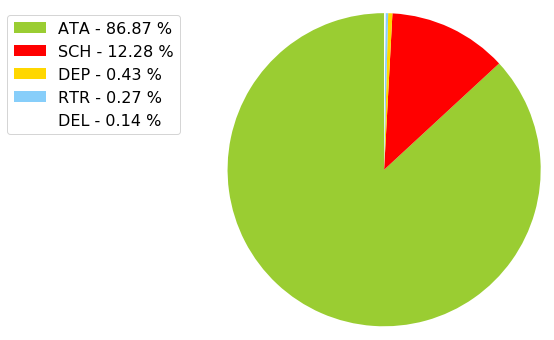

In [9]:
fig = plt.figure(figsize=(10,6))
colors = ['yellowgreen','red','gold','lightskyblue','white']
values = df_raw['STATUS'].value_counts().values
indexes = df_raw['STATUS'].value_counts().index
porcent = df_raw['STATUS'].value_counts()*100.0 /len(df_raw)

patches, texts = plt.pie(values, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(indexes, porcent)]

patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=16)

In [10]:
df_raw.AC.value_counts() #populated cat feature

TU 320IMU    4724
TU 320IMW    4685
TU 320IMT    4634
TU 320IMR    4601
TU 320IMV    4589
             ... 
BJ 320INH       6
OL 321ABY       5
TU 32A32A       2
TU CR9XXX       2
TU 320320       1
Name: AC, Length: 68, dtype: int64

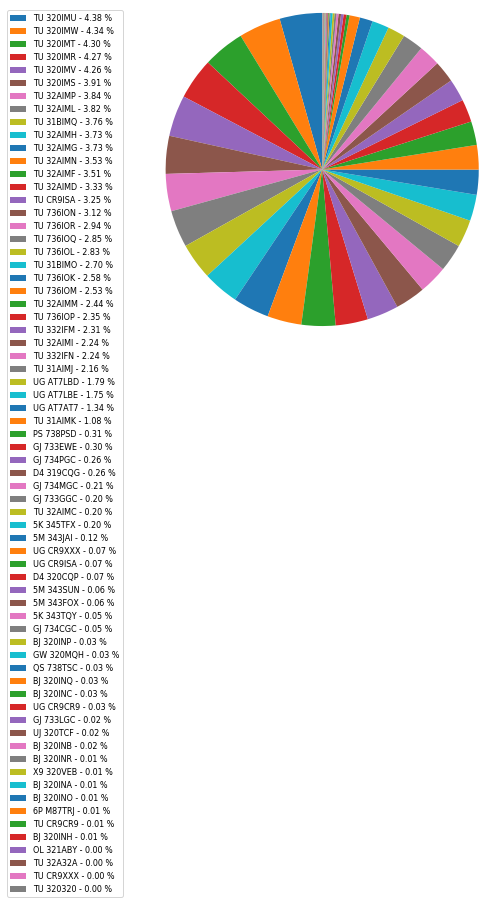

In [11]:
fig = plt.figure(figsize=(10,6))
values = df_raw['AC'].value_counts().values
indexes = df_raw['AC'].value_counts().index
porcent = df_raw['AC'].value_counts()*100.0 /len(df_raw)

patches, texts = plt.pie(values, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(indexes, porcent)]

patches, labels, dummy =  zip(*sorted(zip(patches, labels, values), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)

In [12]:
df_raw.ARRSTN.value_counts()

TUN    42572
DJE    10198
ORY     6755
MIR     5251
MRS     2845
       ...  
LAD        1
RAK        1
KBP        1
KRT        1
ADB        1
Name: ARRSTN, Length: 128, dtype: int64

In [13]:
df_raw.DEPSTN.value_counts() 

TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
KBP        1
KTW        1
TLL        1
KRT        1
ADB        1
Name: DEPSTN, Length: 132, dtype: int64

In [14]:
df_raw.FLTID.value_counts() 

WKL 0000     3105
TU 0613      1284
TU 0397      1184
AOG 0000     1103
TU 0634      1075
             ... 
TU 9974         1
TU 2749         1
TU 3210         1
TU 3299         1
DAT 4444        1
Name: FLTID, Length: 1861, dtype: int64

In [15]:
df_raw.AC.value_counts()

TU 320IMU    4724
TU 320IMW    4685
TU 320IMT    4634
TU 320IMR    4601
TU 320IMV    4589
             ... 
BJ 320INH       6
OL 321ABY       5
TU 32A32A       2
TU CR9XXX       2
TU 320320       1
Name: AC, Length: 68, dtype: int64

In [16]:
print('Flights are located between: '+str(df_raw.DATOP.min())+ ' and '+str(df_raw.DATOP.max()))

Flights are located between: 2016-01-01 and 2018-12-31


### Target Data Visualisation:

In [17]:
df_raw['target'].describe()

count    107833.000000
mean         48.733013
std         117.135562
min           0.000000
25%           0.000000
50%          14.000000
75%          43.000000
max        3451.000000
Name: target, dtype: float64

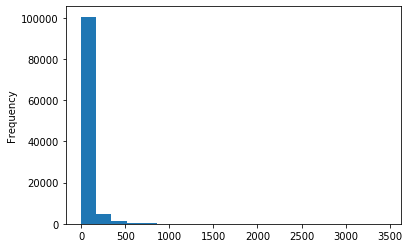

In [18]:
df_raw['target'].plot.hist(bins=20)

## Feature Engineering:

### Date Data Engineering:

In [19]:
df_raw['DATOP'] = pd.to_datetime(df_raw['DATOP'])
df_raw['STD'] = pd.to_datetime(df_raw['STD'])
df_raw['STA'] = pd.to_datetime(df_raw['STA'], format ='%Y-%m-%d %H.%M.%S')

In [20]:
df_raw['FLTDUR'] = df_raw['STA'] - df_raw['STD'] #Flight duration 

In [21]:
df_raw['STDYR'] = df_raw['STD'].dt.year
df_raw['STDMONTH'] = df_raw['STD'].dt.month
df_raw['STDDAY'] = df_raw['STD'].dt.day
df_raw['STDDAYWEEK'] = df_raw['STD'].dt.weekday
df_raw['STDHR'] = df_raw['STD'].dt.hour

In [22]:
df_raw['STAYR'] = df_raw['STA'].dt.year
df_raw['STAMONTH'] = df_raw['STA'].dt.month
df_raw['STADAY'] = df_raw['STA'].dt.day
df_raw['STADAYWEEK'] = df_raw['STA'].dt.weekday
df_raw['STAHR'] = df_raw['STA'].dt.hour

In [23]:
df_raw['FLTDUR_FLOAT_MIN'] = df_raw['FLTDUR'].dt.total_seconds()/60

### New Features:

In [24]:
df_raw['FLT_TRAGECTORY'] = df_raw['DEPSTN'] + ' ' + df_raw['ARRSTN'] #flight tragectory

In [25]:
def get_airline_id(flight_id):
    return ''.join(x for x in flight_id[:3] if x.isalpha())

In [26]:
df_raw['AIRLINEID_AC'] = df_raw['AC'].map(get_airline_id)

In [27]:
df_raw['AIRLINEID_FLTID'] = df_raw['FLTID'].map(get_airline_id)

In [28]:
df_raw.shape

(107833, 24)

In [29]:
df_raw.FLTID

ID
train_id_0          TU 0712 
train_id_1          TU 0757 
train_id_2          TU 0214 
train_id_3          TU 0480 
train_id_4          TU 0338 
                     ...    
train_id_107828    WKL 0000 
train_id_107829     UG 0003 
train_id_107830    SGT 0000 
train_id_107831     UG 0010 
train_id_107832     UG 0002 
Name: FLTID, Length: 107833, dtype: object

### Categorical Data Encoding: 

In [32]:
from sklearn.model_selection import train_test_split

#### LeaveOneOut Encoder:

In [33]:
target_list = ['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_raw.drop(target_list,axis=1),df_raw[target_list], test_size=0.1,random_state=17)

In [35]:
LOOE_encoder = LeaveOneOutEncoder()
X_enc_train = LOOE_encoder.fit_transform(X_train,y_train)
X_enc_test = LOOE_encoder.transform(X_test)

## Data preparation:

In [36]:
X_final_train = X_enc_train.drop(['STD','STA','FLTDUR','DATOP'], axis=1)
X_final_test = X_enc_test.drop(['STD','STA','FLTDUR','DATOP'], axis=1)

In [37]:
X_final_train

,FLTID,DEPSTN,ARRSTN,STATUS,AC,STDYR,STDMONTH,STDDAY,STDDAYWEEK,STDHR,STAYR,STAMONTH,STADAY,STADAYWEEK,STAHR,FLTDUR_FLOAT_MIN,FLT_TRAGECTORY,AIRLINEID_AC,AIRLINEID_FLTID
ID,,,,,,,,,,,,,,,,,,,
train_id_27598,40.579241,52.030828,50.577056,55.712175,58.553846,2016,9,10,5,10,2016,9,10,5,12,145.0,53.816396,50.625146,55.876011
train_id_98934,24.522373,28.113629,42.334158,55.713669,38.811599,2018,11,30,4,6,2018,11,30,4,9,165.0,34.128571,50.626550,55.877525
train_id_18670,15.182540,44.742381,78.226971,55.713503,35.100619,2016,8,4,3,18,2016,8,4,3,20,135.0,100.059233,50.626394,6.918118
train_id_49984,114.833866,48.310428,50.579716,55.713385,57.255206,2017,10,17,1,19,2017,10,17,1,21,140.0,48.442822,50.626282,55.877236
train_id_30122,1.251790,28.113629,50.580342,0.000000,1.733217,2016,6,27,0,7,2016,6,27,0,8,60.0,11.785932,0.846701,6.919765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_id_42297,25.888043,48.329830,50.580342,55.713669,56.568600,2017,5,15,0,10,2017,5,15,0,13,145.0,48.462287,50.626550,55.877525
train_id_98710,32.379070,35.293151,58.802440,55.713563,39.849091,2018,11,3,5,5,2018,11,3,5,7,125.0,38.023861,50.626450,55.877417
train_id_34959,84.545455,28.013273,69.714083,55.702644,58.542857,2017,1,22,6,1,2017,1,22,6,5,230.0,59.151515,50.616190,55.866350


## Machine Learning:

In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import sklearn.metrics
from catboost import CatBoostRegressor, Pool
import math
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
seed = 42

In [40]:
kfold = KFold(n_splits =3 , shuffle = True, random_state = seed)

#### Puisque c'est une regression, les métriques choisies seront: R2 et RMSE. 

### Random Estimator: 
##### (Benchmark des métriques)

In [41]:
y_mean = y_train.mean()
y_rand_est = np.full(shape=len(y_test),
                    fill_value=y_mean,
                    dtype=np.float)

In [42]:
y_rand_est

array([48.77826665, 48.77826665, 48.77826665, ..., 48.77826665,
       48.77826665, 48.77826665])

In [43]:
math.sqrt(mean_squared_error(y_test.values,y_rand_est))

115.91738285210742

In [44]:
r2_score(y_test.values,y_rand_est) #by definition = 0

-1.5239077331807849e-05

### Linear Regression:

In [45]:
LR = LinearRegression()
LR.fit(X_final_train, y_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
np.sqrt(abs(mean_squared_error(y_train, LR.predict(X_final_train))))

112.8347551665119

In [47]:
np.sqrt(abs(mean_squared_error(y_test, LR.predict(X_final_test))))

111.73752518982037

In [48]:
r2_score(y_test, LR.predict(X_final_test))

0.07080346812537797

### Random Forest:

In [50]:
RF = RandomForestRegressor(n_estimators=10)
RF.fit(X_final_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
np.sqrt(abs(mean_squared_error(y_train, RF.predict(X_final_train))))

4.437152660588973

In [52]:
np.sqrt(abs(mean_squared_error(y_test, RF.predict(X_final_test))))

115.43507778743341

In [53]:
r2_score(y_test, RF.predict(X_final_test))

0.008289106798195833

### Gradient Boost:

In [54]:
params_GB = {'n_estimators': 200,
          'max_depth': 7,
          'min_samples_split': 10,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [55]:
GB = GradientBoostingRegressor(**params_GB)
GB.fit(X_final_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
np.sqrt(abs(mean_squared_error(y_train, GB.predict(X_final_train))))

0.1270575575410935

In [57]:
np.sqrt(abs(mean_squared_error(y_test, GB.predict(X_final_test))))

115.43510494599055

In [59]:
r2_score(y_test, GB.predict(X_final_test))

0.008288640155982074

### XG Boost:

In [60]:
XGB = XGBRegressor()
XGB.fit(X_final_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [61]:
np.sqrt(abs(mean_squared_error(y_train, XGB.predict(X_final_train))))

0.8085924737687704

In [62]:
np.sqrt(abs(mean_squared_error(y_test, XGB.predict(X_final_test))))

115.27827382610288

In [63]:
r2_score(y_test, XGB.predict(X_final_test))

0.010981504691976118

### CatBoost

In [64]:
df_features = df_raw.drop(['target'],axis=1)
df_target = df_raw['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1,random_state=17)

In [66]:
cat_features = np.where(X_train.dtypes == 'object')[0] #categorical features

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97049 entries, train_id_27598 to train_id_76399
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   DATOP             97049 non-null  datetime64[ns] 
 1   FLTID             97049 non-null  object         
 2   DEPSTN            97049 non-null  object         
 3   ARRSTN            97049 non-null  object         
 4   STD               97049 non-null  datetime64[ns] 
 5   STA               97049 non-null  datetime64[ns] 
 6   STATUS            97049 non-null  object         
 7   AC                97049 non-null  object         
 8   FLTDUR            97049 non-null  timedelta64[ns]
 9   STDYR             97049 non-null  int64          
 10  STDMONTH          97049 non-null  int64          
 11  STDDAY            97049 non-null  int64          
 12  STDDAYWEEK        97049 non-null  int64          
 13  STDHR             97049 non-null  int64     

### Grid Search:  !!!Takes time to run!!!

#### Since the loss is decreasing in regard to 'iterations', let's set 'iterations = 100'
#### Since the loss is decreasing in regard to 'depth', let's set 'depth = 15'

In [68]:
%%time
model = CatBoostRegressor(iterations = 100, depth = 15)
CB_parameters = {'learning_rate' : [0.05, 0.1],
              'l2_leaf_reg': [1,3]
             }
grid = GridSearchCV(estimator=model, scoring='neg_mean_squared_error', param_grid = CB_parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train,cat_features=cat_features,eval_set=(X_test, y_test)) 

0:	learn: 116.0899401	test: 115.0066839	best: 115.0066839 (0)	total: 2.2s	remaining: 3m 38s
1:	learn: 114.9768168	test: 114.2727392	best: 114.2727392 (1)	total: 4.48s	remaining: 3m 39s
2:	learn: 113.9681287	test: 113.6158262	best: 113.6158262 (2)	total: 6.32s	remaining: 3m 24s
3:	learn: 113.1380746	test: 113.0535342	best: 113.0535342 (3)	total: 8.28s	remaining: 3m 18s
4:	learn: 112.3369020	test: 112.5610665	best: 112.5610665 (4)	total: 10.2s	remaining: 3m 13s
5:	learn: 111.6345631	test: 112.1868748	best: 112.1868748 (5)	total: 12.1s	remaining: 3m 9s
6:	learn: 111.1089047	test: 111.8815782	best: 111.8815782 (6)	total: 14s	remaining: 3m 5s
7:	learn: 110.5689165	test: 111.5188471	best: 111.5188471 (7)	total: 15.9s	remaining: 3m 2s
8:	learn: 110.0224162	test: 111.2145101	best: 111.2145101 (8)	total: 17.9s	remaining: 3m
9:	learn: 109.4560486	test: 111.0032140	best: 111.0032140 (9)	total: 19.7s	remaining: 2m 57s
10:	learn: 108.9014266	test: 110.7543217	best: 110.7543217 (10)	total: 21.6s	rem

88:	learn: 88.2078306	test: 105.5650433	best: 105.5650433 (88)	total: 2m 45s	remaining: 20.5s
89:	learn: 88.0350230	test: 105.5550649	best: 105.5550649 (89)	total: 2m 47s	remaining: 18.6s
90:	learn: 87.8596288	test: 105.5230610	best: 105.5230610 (90)	total: 2m 49s	remaining: 16.7s
91:	learn: 87.7718145	test: 105.5342350	best: 105.5230610 (90)	total: 2m 50s	remaining: 14.9s
92:	learn: 87.6393541	test: 105.5121996	best: 105.5121996 (92)	total: 2m 52s	remaining: 13s
93:	learn: 87.3625607	test: 105.4958578	best: 105.4958578 (93)	total: 2m 54s	remaining: 11.1s
94:	learn: 87.1835272	test: 105.4988316	best: 105.4958578 (93)	total: 2m 55s	remaining: 9.26s
95:	learn: 87.0614605	test: 105.4466845	best: 105.4466845 (95)	total: 2m 57s	remaining: 7.4s
96:	learn: 86.9262426	test: 105.4546806	best: 105.4466845 (95)	total: 2m 59s	remaining: 5.54s
97:	learn: 86.7706318	test: 105.4477963	best: 105.4466845 (95)	total: 3m	remaining: 3.69s
98:	learn: 86.6995625	test: 105.4492691	best: 105.4466845 (95)	tota

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x000001E306C9ADC8>,
             iid='warn', n_jobs=-1,
             param_grid={'l2_leaf_reg': [1, 3], 'learning_rate': [0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [69]:
print('Best RMSE: \n')
print(math.sqrt(abs(grid.score(X_test, y_test))))
print('\nBest params: \n')
print(grid.best_params_)

Best RMSE: 

105.42606927619047

Best params: 

{'l2_leaf_reg': 3, 'learning_rate': 0.1}


### Fitting Model: 

#### With leaf_reg = 5, loss is more shrinked.
#### This result comes for a grid search over leaf_reg = [1,3,5,7]. Unfortunately, I didn't save it.

In [70]:
model = CatBoostRegressor(iterations=200, depth=15, learning_rate=0.1,l2_leaf_reg= 5, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=cat_features,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 116.0755441	test: 115.0351391	best: 115.0351391 (0)	total: 4.08s	remaining: 13m 30s
1:	learn: 115.0198718	test: 114.2901714	best: 114.2901714 (1)	total: 8.02s	remaining: 13m 14s
2:	learn: 114.0894259	test: 113.6506339	best: 113.6506339 (2)	total: 12.2s	remaining: 13m 19s
3:	learn: 113.4177139	test: 113.1199087	best: 113.1199087 (3)	total: 15.9s	remaining: 12m 58s
4:	learn: 112.6886631	test: 112.6966693	best: 112.6966693 (4)	total: 19.6s	remaining: 12m 44s
5:	learn: 112.0693086	test: 112.2731537	best: 112.2731537 (5)	total: 23.7s	remaining: 12m 46s
6:	learn: 111.4075229	test: 111.9482156	best: 111.9482156 (6)	total: 27.5s	remaining: 12m 38s
7:	learn: 110.8122688	test: 111.6291355	best: 111.6291355 (7)	total: 31.5s	remaining: 12m 36s
8:	learn: 110.2333182	test: 111.4100489	best: 111.4100489 (8)	total: 35.1s	remaining: 12m 25s
9:	learn: 109.7102100	test: 111.1292026	best: 111.1292026 (9)	total: 39.3s	remaining: 12m 25s
10:	learn: 109.0678717	test: 110.8756098	best: 110.8756098 (

87:	learn: 90.9431357	test: 106.3062474	best: 106.2883667 (84)	total: 5m 42s	remaining: 7m 15s
88:	learn: 90.6871226	test: 106.2857748	best: 106.2857748 (88)	total: 5m 46s	remaining: 7m 12s
89:	learn: 90.4814801	test: 106.2459245	best: 106.2459245 (89)	total: 5m 50s	remaining: 7m 8s
90:	learn: 90.3339722	test: 106.2184360	best: 106.2184360 (90)	total: 5m 55s	remaining: 7m 5s
91:	learn: 90.2595633	test: 106.2288532	best: 106.2184360 (90)	total: 5m 59s	remaining: 7m 2s
92:	learn: 90.1649008	test: 106.2295349	best: 106.2184360 (90)	total: 6m 4s	remaining: 6m 59s
93:	learn: 90.0543845	test: 106.2180041	best: 106.2180041 (93)	total: 6m 8s	remaining: 6m 55s
94:	learn: 90.0162719	test: 106.1981638	best: 106.1981638 (94)	total: 6m 12s	remaining: 6m 52s
95:	learn: 89.9283272	test: 106.1869853	best: 106.1869853 (95)	total: 6m 16s	remaining: 6m 48s
96:	learn: 89.8811620	test: 106.1709338	best: 106.1709338 (96)	total: 6m 21s	remaining: 6m 45s
97:	learn: 89.7898636	test: 106.1717663	best: 106.17093

172:	learn: 80.1649040	test: 104.7116811	best: 104.7116811 (172)	total: 11m 43s	remaining: 1m 49s
173:	learn: 80.1162202	test: 104.7088261	best: 104.7088261 (173)	total: 11m 48s	remaining: 1m 45s
174:	learn: 79.9577336	test: 104.7053466	best: 104.7053466 (174)	total: 11m 54s	remaining: 1m 42s
175:	learn: 79.9369291	test: 104.6988606	best: 104.6988606 (175)	total: 11m 59s	remaining: 1m 38s
176:	learn: 79.8731108	test: 104.7111761	best: 104.6988606 (175)	total: 12m 5s	remaining: 1m 34s
177:	learn: 79.8305140	test: 104.7093329	best: 104.6988606 (175)	total: 12m 10s	remaining: 1m 30s
178:	learn: 79.7858000	test: 104.6955514	best: 104.6955514 (178)	total: 12m 15s	remaining: 1m 26s
179:	learn: 79.6283126	test: 104.6707489	best: 104.6707489 (179)	total: 12m 20s	remaining: 1m 22s
180:	learn: 79.5434806	test: 104.6690050	best: 104.6690050 (180)	total: 12m 24s	remaining: 1m 18s
181:	learn: 79.5111644	test: 104.6743392	best: 104.6690050 (180)	total: 12m 29s	remaining: 1m 14s
182:	learn: 79.503131

#### Note: The best iteration is yet to come!

### Feature Importance:

In [71]:
feature_importance = model.get_feature_importance(prettified =True)

In [72]:
feature_importance

,Feature Id,Importances
0,AC,10.740371
1,FLTID,10.553381
2,DEPSTN,5.802589
3,FLT_TRAGECTORY,5.292273
4,STADAY,5.190682
5,STDMONTH,5.018021
6,STDDAY,5.010090
7,STADAYWEEK,4.976986
8,ARRSTN,4.836476
9,STATUS,4.673873


([<matplotlib.axis.XTick at 0x1e306ca6f88>,
 <a list of 23 Text xticklabel objects>)

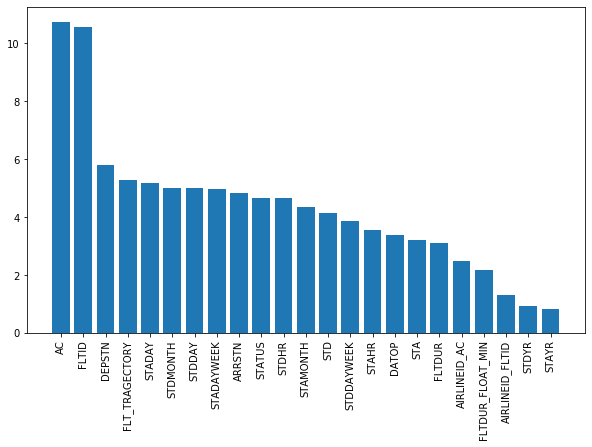

In [73]:
fig_ = plt.figure(figsize=(10,6))
plt.bar(feature_importance['Feature Id'],feature_importance['Importances'])
plt.xticks(range(len(feature_importance['Feature Id'])), feature_importance['Feature Id'], rotation=90)

##### Other interesting analysis: ShapValues!

### Final Fit: !!!Takes time to run!!!

In [74]:
model = CatBoostRegressor(iterations=700, depth=15, learning_rate=0.1,l2_leaf_reg= 5, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=cat_features,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 116.0755441	test: 115.0351391	best: 115.0351391 (0)	total: 3.6s	remaining: 41m 54s
1:	learn: 115.0198718	test: 114.2901714	best: 114.2901714 (1)	total: 7.24s	remaining: 42m 8s
2:	learn: 114.0894259	test: 113.6506339	best: 113.6506339 (2)	total: 11.3s	remaining: 43m 38s
3:	learn: 113.4177139	test: 113.1199087	best: 113.1199087 (3)	total: 14.9s	remaining: 43m 9s
4:	learn: 112.6886631	test: 112.6966693	best: 112.6966693 (4)	total: 18.4s	remaining: 42m 41s
5:	learn: 112.0693086	test: 112.2731537	best: 112.2731537 (5)	total: 22.1s	remaining: 42m 36s
6:	learn: 111.4075229	test: 111.9482156	best: 111.9482156 (6)	total: 25.6s	remaining: 42m 17s
7:	learn: 110.8122688	test: 111.6291355	best: 111.6291355 (7)	total: 29.5s	remaining: 42m 29s
8:	learn: 110.2333182	test: 111.4100489	best: 111.4100489 (8)	total: 32.9s	remaining: 42m 9s
9:	learn: 109.7102100	test: 111.1292026	best: 111.1292026 (9)	total: 36.8s	remaining: 42m 21s
10:	learn: 109.0678717	test: 110.8756098	best: 110.8756098 (10)	

86:	learn: 91.0759925	test: 106.2936190	best: 106.2883667 (84)	total: 6m 6s	remaining: 43m 2s
87:	learn: 90.9431357	test: 106.3062474	best: 106.2883667 (84)	total: 6m 11s	remaining: 43m 1s
88:	learn: 90.6871226	test: 106.2857748	best: 106.2857748 (88)	total: 6m 15s	remaining: 42m 59s
89:	learn: 90.4814801	test: 106.2459245	best: 106.2459245 (89)	total: 6m 20s	remaining: 42m 58s
90:	learn: 90.3339722	test: 106.2184360	best: 106.2184360 (90)	total: 6m 25s	remaining: 42m 58s
91:	learn: 90.2595633	test: 106.2288532	best: 106.2184360 (90)	total: 6m 30s	remaining: 43m
92:	learn: 90.1649008	test: 106.2295349	best: 106.2184360 (90)	total: 6m 35s	remaining: 42m 59s
93:	learn: 90.0543845	test: 106.2180041	best: 106.2180041 (93)	total: 6m 40s	remaining: 42m 58s
94:	learn: 90.0162719	test: 106.1981638	best: 106.1981638 (94)	total: 6m 44s	remaining: 42m 56s
95:	learn: 89.9283272	test: 106.1869853	best: 106.1869853 (95)	total: 6m 48s	remaining: 42m 48s
96:	learn: 89.8811620	test: 106.1709338	best: 1

171:	learn: 80.1987608	test: 104.7163236	best: 104.7163236 (171)	total: 11m 46s	remaining: 36m 9s
172:	learn: 80.1649040	test: 104.7116811	best: 104.7116811 (172)	total: 11m 50s	remaining: 36m 5s
173:	learn: 80.1162202	test: 104.7088261	best: 104.7088261 (173)	total: 11m 55s	remaining: 36m 2s
174:	learn: 79.9577336	test: 104.7053466	best: 104.7053466 (174)	total: 11m 59s	remaining: 35m 58s
175:	learn: 79.9369291	test: 104.6988606	best: 104.6988606 (175)	total: 12m 3s	remaining: 35m 55s
176:	learn: 79.8731108	test: 104.7111761	best: 104.6988606 (175)	total: 12m 8s	remaining: 35m 53s
177:	learn: 79.8305140	test: 104.7093329	best: 104.6988606 (175)	total: 12m 14s	remaining: 35m 53s
178:	learn: 79.7858000	test: 104.6955514	best: 104.6955514 (178)	total: 12m 19s	remaining: 35m 51s
179:	learn: 79.6283126	test: 104.6707489	best: 104.6707489 (179)	total: 12m 22s	remaining: 35m 45s
180:	learn: 79.5434806	test: 104.6690050	best: 104.6690050 (180)	total: 12m 26s	remaining: 35m 39s
181:	learn: 79.

255:	learn: 72.8705624	test: 104.0392322	best: 104.0392322 (255)	total: 17m 30s	remaining: 30m 22s
256:	learn: 72.8548680	test: 104.0409192	best: 104.0392322 (255)	total: 17m 34s	remaining: 30m 18s
257:	learn: 72.7499894	test: 104.0479727	best: 104.0392322 (255)	total: 17m 39s	remaining: 30m 15s
258:	learn: 72.6509662	test: 104.0409213	best: 104.0392322 (255)	total: 17m 44s	remaining: 30m 11s
259:	learn: 72.6362495	test: 104.0426213	best: 104.0392322 (255)	total: 17m 47s	remaining: 30m 7s
260:	learn: 72.4750089	test: 104.0167901	best: 104.0167901 (260)	total: 17m 51s	remaining: 30m 2s
261:	learn: 72.3825059	test: 104.0034830	best: 104.0034830 (261)	total: 17m 55s	remaining: 29m 58s
262:	learn: 72.3258688	test: 103.9918220	best: 103.9918220 (262)	total: 17m 59s	remaining: 29m 53s
263:	learn: 72.1771077	test: 103.9552036	best: 103.9552036 (263)	total: 18m 3s	remaining: 29m 48s
264:	learn: 72.0719800	test: 103.9436933	best: 103.9436933 (264)	total: 18m 7s	remaining: 29m 44s
265:	learn: 72

339:	learn: 66.6224042	test: 103.5755574	best: 103.5755574 (339)	total: 23m 18s	remaining: 24m 40s
340:	learn: 66.6143285	test: 103.5703344	best: 103.5703344 (340)	total: 23m 22s	remaining: 24m 36s
341:	learn: 66.4441012	test: 103.5374356	best: 103.5374356 (341)	total: 23m 26s	remaining: 24m 32s
342:	learn: 66.3918231	test: 103.5428680	best: 103.5374356 (341)	total: 23m 30s	remaining: 24m 27s
343:	learn: 66.3846408	test: 103.5414549	best: 103.5374356 (341)	total: 23m 34s	remaining: 24m 23s
344:	learn: 66.2361191	test: 103.5259952	best: 103.5259952 (344)	total: 23m 39s	remaining: 24m 20s
345:	learn: 66.2149673	test: 103.5280032	best: 103.5259952 (344)	total: 23m 43s	remaining: 24m 16s
346:	learn: 66.1126582	test: 103.5218944	best: 103.5218944 (346)	total: 23m 47s	remaining: 24m 12s
347:	learn: 66.0255987	test: 103.5005935	best: 103.5005935 (347)	total: 23m 51s	remaining: 24m 8s
348:	learn: 66.0187442	test: 103.4994066	best: 103.4994066 (348)	total: 23m 55s	remaining: 24m 4s
349:	learn: 

423:	learn: 60.6630517	test: 103.0901561	best: 103.0848103 (421)	total: 29m 7s	remaining: 18m 57s
424:	learn: 60.6332814	test: 103.0894763	best: 103.0848103 (421)	total: 29m 11s	remaining: 18m 53s
425:	learn: 60.5862678	test: 103.0942093	best: 103.0848103 (421)	total: 29m 16s	remaining: 18m 49s
426:	learn: 60.4952606	test: 103.0914715	best: 103.0848103 (421)	total: 29m 20s	remaining: 18m 45s
427:	learn: 60.3387653	test: 103.0469701	best: 103.0469701 (427)	total: 29m 24s	remaining: 18m 41s
428:	learn: 60.2610395	test: 103.0487585	best: 103.0469701 (427)	total: 29m 28s	remaining: 18m 37s
429:	learn: 60.1474691	test: 103.0486898	best: 103.0469701 (427)	total: 29m 32s	remaining: 18m 33s
430:	learn: 60.1434940	test: 103.0494009	best: 103.0469701 (427)	total: 29m 36s	remaining: 18m 28s
431:	learn: 60.0828759	test: 103.0560016	best: 103.0469701 (427)	total: 29m 41s	remaining: 18m 25s
432:	learn: 59.9985560	test: 103.0451543	best: 103.0451543 (432)	total: 29m 45s	remaining: 18m 21s
433:	learn:

507:	learn: 56.4522609	test: 102.7685633	best: 102.7685633 (507)	total: 34m 59s	remaining: 13m 13s
508:	learn: 56.4470346	test: 102.7670978	best: 102.7670978 (508)	total: 35m 4s	remaining: 13m 9s
509:	learn: 56.4442300	test: 102.7692867	best: 102.7670978 (508)	total: 35m 8s	remaining: 13m 5s
510:	learn: 56.4311209	test: 102.7655783	best: 102.7655783 (510)	total: 35m 12s	remaining: 13m 1s
511:	learn: 56.3468037	test: 102.7685909	best: 102.7655783 (510)	total: 35m 17s	remaining: 12m 57s
512:	learn: 56.2648986	test: 102.7695558	best: 102.7655783 (510)	total: 35m 21s	remaining: 12m 53s
513:	learn: 56.2323056	test: 102.7666893	best: 102.7655783 (510)	total: 35m 25s	remaining: 12m 49s
514:	learn: 56.1662504	test: 102.7649509	best: 102.7649509 (514)	total: 35m 29s	remaining: 12m 45s
515:	learn: 56.1191745	test: 102.7621323	best: 102.7621323 (515)	total: 35m 34s	remaining: 12m 41s
516:	learn: 56.0619276	test: 102.7549362	best: 102.7549362 (516)	total: 35m 39s	remaining: 12m 37s
517:	learn: 56.

591:	learn: 52.9033555	test: 102.6823442	best: 102.6616404 (579)	total: 41m 2s	remaining: 7m 29s
592:	learn: 52.8135856	test: 102.6796635	best: 102.6616404 (579)	total: 41m 7s	remaining: 7m 25s
593:	learn: 52.8037572	test: 102.6772031	best: 102.6616404 (579)	total: 41m 11s	remaining: 7m 21s
594:	learn: 52.7486416	test: 102.6677099	best: 102.6616404 (579)	total: 41m 15s	remaining: 7m 16s
595:	learn: 52.7450174	test: 102.6672519	best: 102.6616404 (579)	total: 41m 20s	remaining: 7m 12s
596:	learn: 52.6759830	test: 102.6696189	best: 102.6616404 (579)	total: 41m 24s	remaining: 7m 8s
597:	learn: 52.6578070	test: 102.6749962	best: 102.6616404 (579)	total: 41m 28s	remaining: 7m 4s
598:	learn: 52.6069698	test: 102.6772492	best: 102.6616404 (579)	total: 41m 32s	remaining: 7m
599:	learn: 52.5991106	test: 102.6768748	best: 102.6616404 (579)	total: 41m 36s	remaining: 6m 56s
600:	learn: 52.5954582	test: 102.6774044	best: 102.6616404 (579)	total: 41m 40s	remaining: 6m 51s
601:	learn: 52.5545468	test:

675:	learn: 49.2995043	test: 102.5898641	best: 102.5640652 (646)	total: 47m 3s	remaining: 1m 40s
676:	learn: 49.2613914	test: 102.5871304	best: 102.5640652 (646)	total: 47m 7s	remaining: 1m 36s
677:	learn: 49.2588426	test: 102.5869892	best: 102.5640652 (646)	total: 47m 12s	remaining: 1m 31s
678:	learn: 49.2099213	test: 102.5850304	best: 102.5640652 (646)	total: 47m 16s	remaining: 1m 27s
679:	learn: 49.2053809	test: 102.5851604	best: 102.5640652 (646)	total: 47m 20s	remaining: 1m 23s
680:	learn: 49.1756811	test: 102.5885022	best: 102.5640652 (646)	total: 47m 24s	remaining: 1m 19s
681:	learn: 49.0888764	test: 102.5845976	best: 102.5640652 (646)	total: 47m 28s	remaining: 1m 15s
682:	learn: 49.0147419	test: 102.5807354	best: 102.5640652 (646)	total: 47m 32s	remaining: 1m 11s
683:	learn: 49.0105230	test: 102.5810892	best: 102.5640652 (646)	total: 47m 37s	remaining: 1m 6s
684:	learn: 48.9543188	test: 102.5749544	best: 102.5640652 (646)	total: 47m 41s	remaining: 1m 2s
685:	learn: 48.9276850	t

##### Results: 
    RMSE = 101,5

# Analyse des résultats:

In [77]:
import seaborn as sns 

In [87]:
y_test_pred = pd.DataFrame(model.predict(X_test), index = X_test.index, columns=['prediction'])

In [89]:
y_test_pred.loc[y_test_pred.prediction<0] = 0 

In [125]:
print(y_test[:10])
print(y_test_pred[:10])

ID
train_id_69632     0.0
train_id_88753     0.0
train_id_3041      0.0
train_id_84105     0.0
train_id_1829     20.0
train_id_49829    20.0
train_id_59214     0.0
train_id_3367     13.0
train_id_81345    70.0
train_id_83134    19.0
Name: target, dtype: float64
                prediction
ID                        
train_id_69632  249.861433
train_id_88753   59.583230
train_id_3041     0.000000
train_id_84105   54.747123
train_id_1829    88.185406
train_id_49829  166.821911
train_id_59214  102.891667
train_id_3367    19.854296
train_id_81345  204.262642
train_id_83134   26.414965


In [99]:
np.sqrt(abs(mean_squared_error(y_test,y_test_pred)))

102.47845347493863

In [160]:
((115**2-101**2)/(115**2))*100

22.86578449905482

In [109]:
df_final = X_test.copy()
df_final['target'] = y_test.copy()
df_final['prediction'] = y_test_pred.copy()

In [122]:
df_final['target'].corr(df_final['prediction'])

0.4692786453710368

In [112]:
df_final['error'] = abs(df_final.target - df_final.prediction)

In [155]:
df_final['target'].describe()

count    10784.000000
mean        48.325760
std        115.921874
min          0.000000
25%          0.000000
50%         13.000000
75%         42.000000
max       2636.000000
Name: target, dtype: float64

In [117]:
df_final['error'].describe()

count    10784.000000
mean        45.387441
std         91.883603
min          0.000000
25%          6.811894
50%         22.337404
75%         52.517806
max       2440.818962
Name: error, dtype: float64

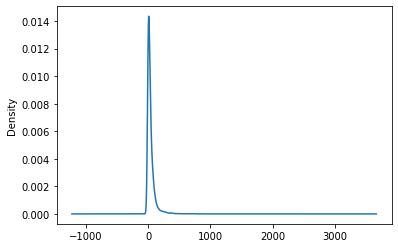

In [123]:
df_final['error'].plot.density()

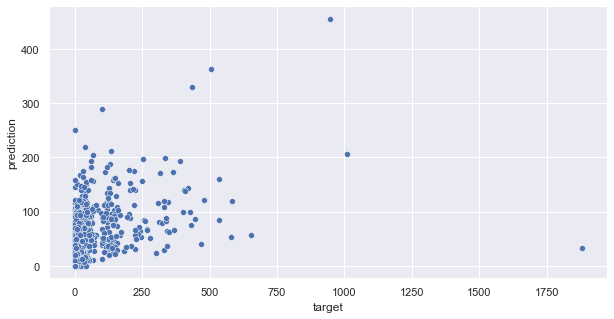

In [149]:
sns.set(rc={'figure.figsize':(10,5)})
sns.scatterplot(data=df_final_sample,x="target",y="prediction")

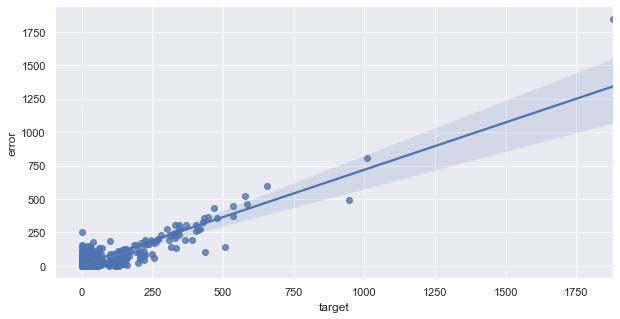

In [151]:
sns.set(rc={'figure.figsize':(10,5)})
sns.regplot(data=df_final_sample,x="target",y="error")

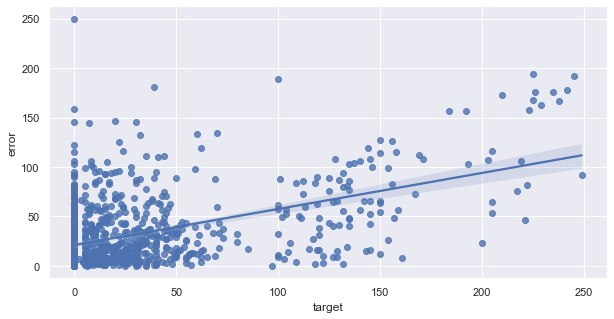

In [152]:
sns.set(rc={'figure.figsize':(10,5)})
sns.regplot(data=df_final_sample.loc[df_final_sample.target<250],x="target",y="error")

In [128]:
df_final.nunique()

DATOP                1011
FLTID                 813
DEPSTN                 90
ARRSTN                 97
STD                 10429
STA                 10484
STATUS                  5
AC                     61
FLTDUR                173
STDYR                   3
STDMONTH               12
STDDAY                 31
STDDAYWEEK              7
STDHR                  24
STAYR                   4
STAMONTH               12
STADAY                 31
STADAYWEEK              7
STAHR                  24
FLTDUR_FLOAT_MIN      173
FLT_TRAGECTORY        422
AIRLINEID_AC           11
AIRLINEID_FLTID        12
target                478
prediction           9544
error                9604
dtype: int64

In [133]:
df_final_sample = df_final[:1000]

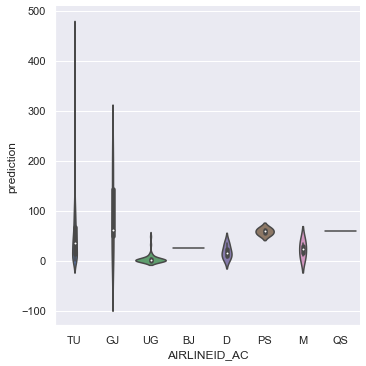

In [145]:
sns.catplot(x="AIRLINEID_AC", y="prediction", kind="violin", data=df_final_sample)

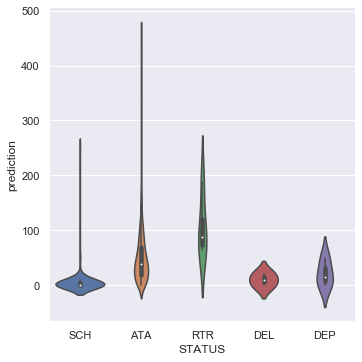

In [134]:
sns.catplot(x="STATUS", y="prediction", kind="violin", data=df_final_sample)

# Validation & Pipeline: (mise en production)

In [75]:
filename = input('Enter data filename: ') #'test.csv'

Enter data filename: test.csv


In [76]:
df_val = pd.read_csv(filename)

df_val.set_index('ID', inplace=True) 

df_val['DATOP'] = pd.to_datetime(df_val['DATOP'])
df_val['STD'] = pd.to_datetime(df_val['STD'])
df_val['STA'] = pd.to_datetime(df_val['STA'], format ='%Y-%m-%d %H.%M.%S')

df_val['FLTDUR'] = df_val['STA'] - df_val['STD']

df_val['STDYR'] = df_val['STD'].dt.year
df_val['STDMONTH'] = df_val['STD'].dt.month
df_val['STDDAY'] = df_val['STD'].dt.day
df_val['STDDAYWEEK'] = df_val['STD'].dt.weekday
df_val['STDHR'] = df_val['STD'].dt.hour

df_val['STAYR'] = df_val['STA'].dt.year
df_val['STAMONTH'] = df_val['STA'].dt.month
df_val['STADAY'] = df_val['STA'].dt.day
df_val['STADAYWEEK'] = df_val['STA'].dt.weekday
df_val['STAHR'] = df_val['STA'].dt.hour

df_val['FLTDUR_FLOAT_MIN'] = df_val['FLTDUR'].dt.total_seconds()/60

df_val['FLT_TRAGECTORY'] = df_val['DEPSTN'] + ' ' + df_val['ARRSTN']

df_val['AIRLINEID_AC'] = df_val['AC'].map(get_airline_id)

df_val['AIRLINEID_FLTID'] = df_val['FLTID'].map(get_airline_id)

X_val = df_val

y_pred = pd.DataFrame(model.predict(X_val), index = X_val.index, columns=['prediction'])

y_pred.loc[y_pred.prediction<0] = 0 

y_pred.to_csv('predictions.csv')

y_pred

,prediction
ID,
test_id_0,17.615472
test_id_1,32.344626
test_id_2,29.213876
test_id_3,38.203380
test_id_4,24.665403
...,...
test_id_9328,133.817772
test_id_9329,25.531855
test_id_9330,16.221140
